### ***Introducción:***

Microproyecto 3, EnfermedadRenal

Integrantes del equipo 7:

#### * Santiago Cano Vásquez

#### * Duberney Gutierrez Bacca

### Preprocesamiento

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [ ]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('EnfermedadRenal.csv')

# Display the first few rows of the dataset
data.head()

,edad,presión arterial,gravedad específica,albúmina,azúcar,glóbulos rojos,celda de pus,grupos de células de pus,bacterias,glucosa en sangre al azar,...,recuento de glóbulos blancos,recuento de glóbulos rojos,hipertensión,diabetes mellitus,enfermedad de la arteria coronaria,apetito,edema de pedal,anemia,clase RESPUESTA,Unnamed: 25
0,48,80,1020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7,50,1020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,NaN
2,62,80,1010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,NaN
3,48,70,1005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51,80,1010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,NaN


revolvemos las filas para que no estén en orden como vienen los datos.

In [ ]:
data = data.sample(frac=1,random_state=25).reset_index(drop=True)
data.duplicated().any()

False

El conjunto de datos parece estar relacionado con las características de pacientes con enfermedad renal. Las columnas representan diferentes características (o features) y hay algunos valores faltantes representados por el símbolo "?".

Preprocesamiento inicial:
Antes de analizar la distribución de la variable objetivo, debemos abordar los siguientes pasos:

Eliminar columnas no necesarias o redundantes.
Lidiar con valores faltantes, representados por "?".
Convertir características categóricas a un formato numérico si es necesario.
Procederé con estos pasos y luego analizaré la distribución de la variable objetivo.​

Vemos que hay una columna que no debería estar

In [ ]:
data[data['Unnamed: 25'].notnull()]

,edad,presión arterial,gravedad específica,albúmina,azúcar,glóbulos rojos,celda de pus,grupos de células de pus,bacterias,glucosa en sangre al azar,...,recuento de glóbulos blancos,recuento de glóbulos rojos,hipertensión,diabetes mellitus,enfermedad de la arteria coronaria,apetito,edema de pedal,anemia,clase RESPUESTA,Unnamed: 25
176,?,70,?,?,?,?,?,notpresent,notpresent,93,...,?,?,yes,NaN,yes,no,good,no,no,ckd
315,75,70,1020,0,0,normal,normal,notpresent,notpresent,107,...,10300,4.8,no,NaN,no,no,good,no,no,notckd


Se puede ver que hay un desfase desde la columna diabetes mellitus, vamos a corregir esto moviendo los valores una columna a la izquierda

In [ ]:
data[data['Unnamed: 25'].notnull()] = pd.concat(
    [data[data['Unnamed: 25'].notnull()].loc[:,:'hipertensión'],
     data[data['Unnamed: 25'].notnull()].loc[:,'diabetes mellitus':].shift(periods=-1,axis=1)]
    ,axis=1)

data['Unnamed: 25'].unique()

array([nan, None], dtype=object)

Como se puede ver se arregló el problema, ahora podemos eliminar la columna.

In [ ]:
data = data.drop(columns=['Unnamed: 25'])

También hay un problema con la variable objetivo

In [ ]:
data['clase RESPUESTA'] = data['clase RESPUESTA'].replace('ckd\t','ckd')

In [ ]:
data['clase RESPUESTA'].unique()

array(['ckd', 'notckd'], dtype=object)

con este problema corregido, nos encargamos de los valores faltantes.

In [ ]:
# Replace '?' with NaN for appropriate handling of missing values
data.replace('?', np.nan, inplace=True)

# Check for the datatype of each column to determine if any conversion is necessary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   edad                                391 non-null    object
 1   presión arterial                    388 non-null    object
 2   gravedad específica                 353 non-null    object
 3   albúmina                            354 non-null    object
 4   azúcar                              351 non-null    object
 5   glóbulos rojos                      248 non-null    object
 6   celda de pus                        335 non-null    object
 7   grupos de células de pus            396 non-null    object
 8   bacterias                           396 non-null    object
 9   glucosa en sangre al azar           356 non-null    object
 10  urea en sangre                      381 non-null    object
 11  creatinina sérica                   383 non-null    object

Las columnas del conjunto de datos son todas de tipo "object", lo que significa que son tratadas como cadenas de texto. Sin embargo, algunas de estas columnas deberían ser numéricas, como "edad", "presión arterial", "gravedad específica", entre otras.


Pasos para el preprocesamiento:
Convertir las columnas apropiadas a tipo numérico.
Convertir características categóricas a un formato numérico cuando sea necesario.
Después de estos pasos, procederé a visualizar la distribución de la variable objetivo ("clase RESPUESTA").​

In [ ]:
# Convert appropriate columns to numeric datatype
numeric_columns = [
    "edad", "presión arterial", "gravedad específica", "glucosa en sangre al azar",
    "urea en sangre", "creatinina sérica", "sodio", "potasio",
    "hemoglobina", "volumen celular empaquetado", "recuento de glóbulos blancos",
    "recuento de glóbulos rojos"
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
binary_columns = [
    "glóbulos rojos", "celda de pus", "grupos de células de pus", "bacterias",
    "hipertensión", "diabetes mellitus", "enfermedad de la arteria coronaria",
    "apetito", "edema de pedal", "anemia"
]

In [ ]:
for c in binary_columns:
    print(data[c].value_counts())

normal      201
abnormal     47
Name: glóbulos rojos, dtype: int64
normal      259
abnormal     76
Name: celda de pus, dtype: int64
notpresent    354
present        42
Name: grupos de células de pus, dtype: int64
notpresent    374
present        22
Name: bacterias, dtype: int64
no     251
yes    147
Name: hipertensión, dtype: int64
no       258
yes      135
\tno       3
\tyes      2
Name: diabetes mellitus, dtype: int64
no      362
yes      34
\tno      2
Name: enfermedad de la arteria coronaria, dtype: int64
good    317
poor     82
Name: apetito, dtype: int64
no     323
yes     76
Name: edema de pedal, dtype: int64
no     339
yes     60
Name: anemia, dtype: int64


Notamos que hay que modificar las columnas diabetes mellitus y enfermedad de la arteria coronaria

In [ ]:
data['diabetes mellitus'] = data['diabetes mellitus'].replace({"\tno":"no","\tyes":"yes"})
data['enfermedad de la arteria coronaria'] = data['enfermedad de la arteria coronaria'].replace({"\tno":"no"})

#### Caracterización de los datos

Veamos que información podemos obtener de las distribuciones de las variables.

In [ ]:
categorical_columns = binary_columns + ["albúmina", "azúcar"]

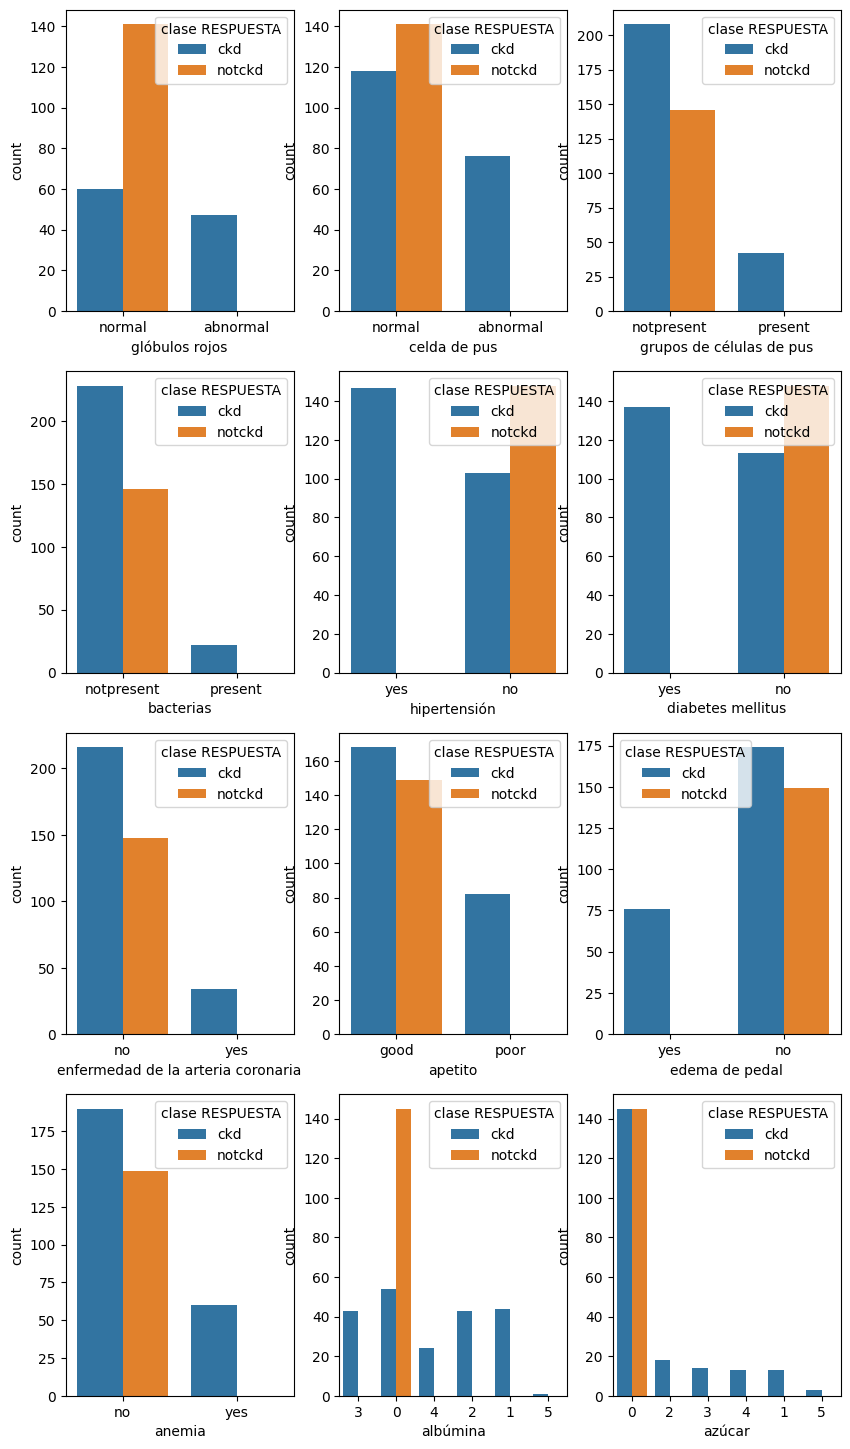

In [ ]:
_, ax = plt.subplots(4, 3, figsize=(10, 18))

ax = ax.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=ax[i], hue='clase RESPUESTA')

plt.show()

De acuerdo a estos gráficos hipertensión y diabetes podrían ser variables relevantes para la clasificación.

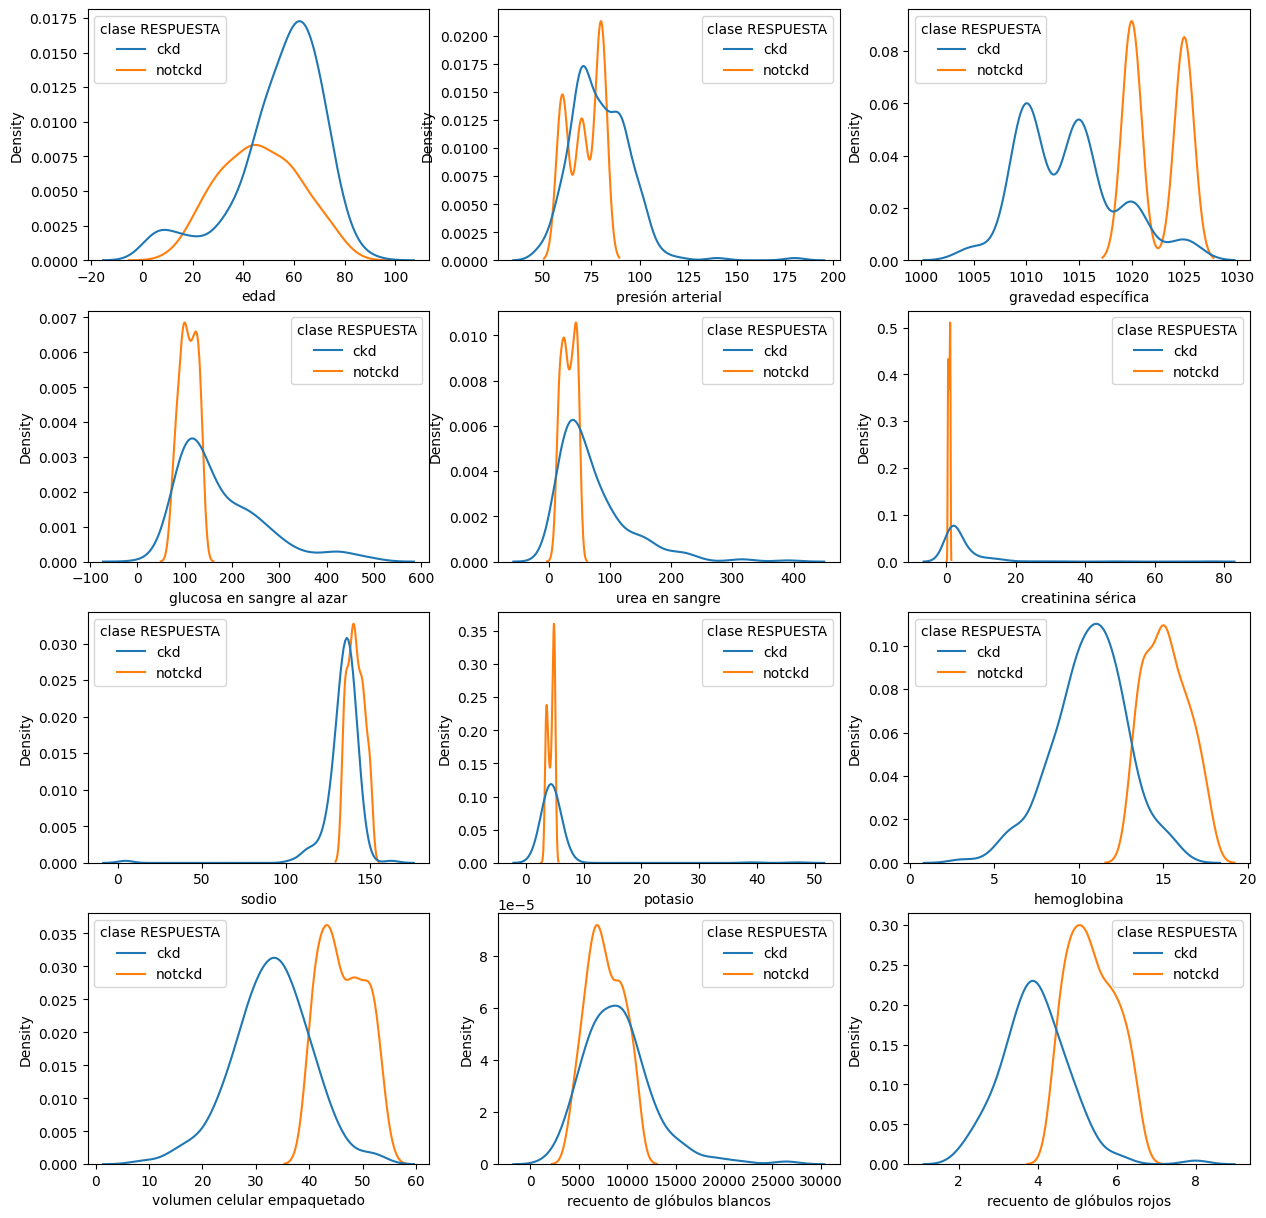

In [ ]:
_, ax = plt.subplots(4, 3, figsize=(15, 15))

#sns.kdeplot(data=data,x='edad',hue="clase RESPUESTA")

ax = ax.flatten()

for i, col in enumerate(numeric_columns):
  sns.kdeplot(data=data, x=col, hue="clase RESPUESTA", ax=ax[i])

plt.show()

Se puede ver una separación de las clases en las variables gravedad especifica, hemoglobina, volumen célular empaquetado y recuento de glóbulos rojos.

#### Manejo de datos faltantes


Debido a que hay muchos valores faltantes (NaN) en el conjunto de datos. Antes de entrenar el árbol de decisión, debemos manejar estos valores faltantes.

Hay varias formas de abordar los valores faltantes:

Eliminar las filas con valores faltantes.
Imputar los valores faltantes usando la media, mediana o moda.
Utilizar técnicas más avanzadas de imputación.
Para simplificar, voy a optar por imputar los valores faltantes numéricos con la mediana y los valores faltantes categóricos con la moda. Después de la imputación, intentaré construir los árboles de decisión.

In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])
numeric_imputer = SimpleImputer(strategy='median')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

#### Transformación de variables categóricas

Convertiremos los datos categóricos en números.

<Axes: title={'center': 'Distribución de la variable objetivo (clase RESPUESTA)'}>

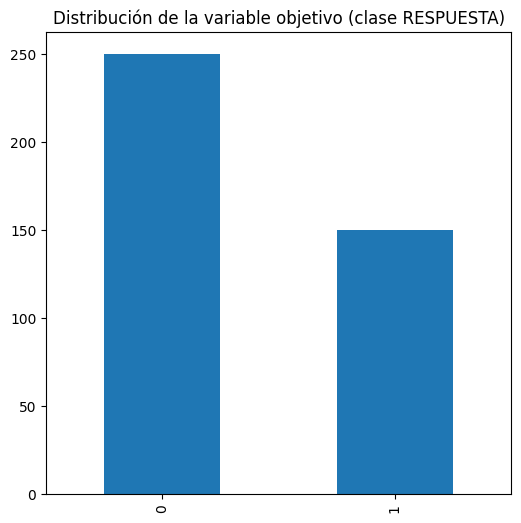

In [ ]:
for col in binary_columns+["clase RESPUESTA"]:
    data[col] = data[col].astype('category').cat.codes

data["clase RESPUESTA"].value_counts().plot(kind='bar', title='Distribución de la variable objetivo (clase RESPUESTA)',figsize=[6,6])

La gráfica muestra la distribución de la variable objetivo "clase RESPUESTA". En este conjunto de datos, la clase "0" representa a los pacientes con enfermedad renal crónica (ckd), mientras que la clase "1" representa a los que no tienen la enfermedad.


Se observa que hay más casos de pacientes con enfermedad renal crónica que aquellos que no la tienen.

#### Selección de características

mostramos la matriz de correlación para los valores numéricos primero y luego para las variables categoricas

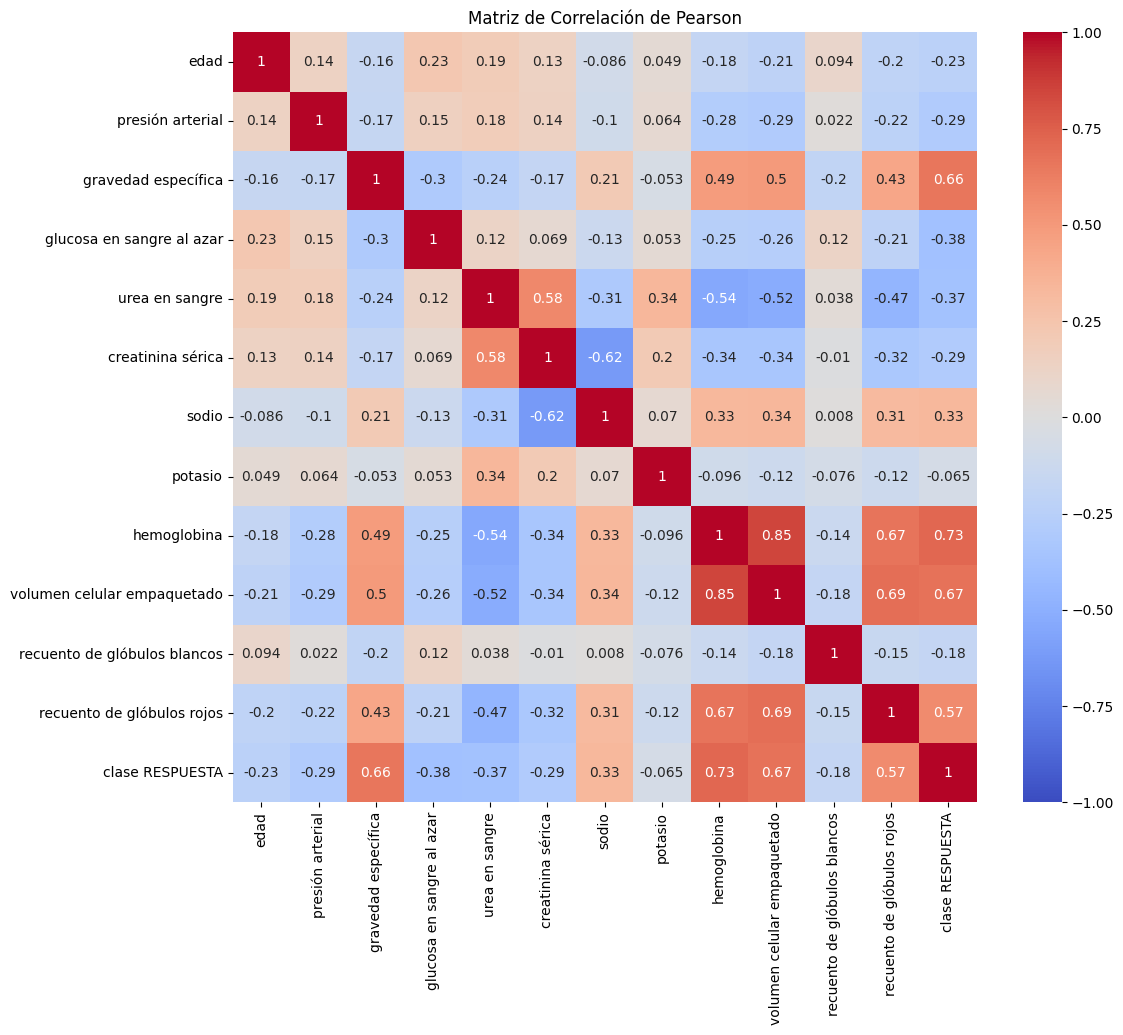

In [ ]:
num_y = numeric_columns+["clase RESPUESTA"]
# Compute the Pearson correlation matrix
correlation_matrix = data[num_y].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Pearson')

plt.show()

La matriz de correlación de Pearson visualizada como un mapa de calor nos muestra cómo están correlacionadas las características entre sí. Una correlación cercana a 1 indica una fuerte correlación positiva, mientras que una correlación cercana a -1 indica una fuerte correlación negativa. Una correlación cercana a 0 indica que no hay mucha correlación lineal entre las características.

Desde la visualización, se pueden hacer algunas observaciones:

Hay algunas características que están altamente correlacionadas entre sí. Por ejemplo, hemoglobina parece tener una correlación negativa con albúmina y urea en sangre.

La característica clase RESPUESTA (nuestra variable objetivo) tiene correlaciones significativas con varias características, en particular con gravedad especifica, recuento de globulos rojos, volumen célular empaquetado y hemoglóbina.

In [ ]:
def cramers_V(df):
    def get_cramersV_corr(var1, var2):
        from scipy.stats import chi2_contingency
        crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
        stat = chi2_contingency(crosstab)[0]
        obs = np.sum(crosstab)
        mini = min(crosstab.shape) - 1
        return (stat/(obs*mini))


    rows= []
    for var1 in df.columns:
        col = []
        for var2 in df.columns:
            cramers = get_cramersV_corr(df[var1], df[var2])
            col.append(round(cramers,2))
        rows.append(col)

    return pd.DataFrame(rows, columns=df.columns, index=df.columns)

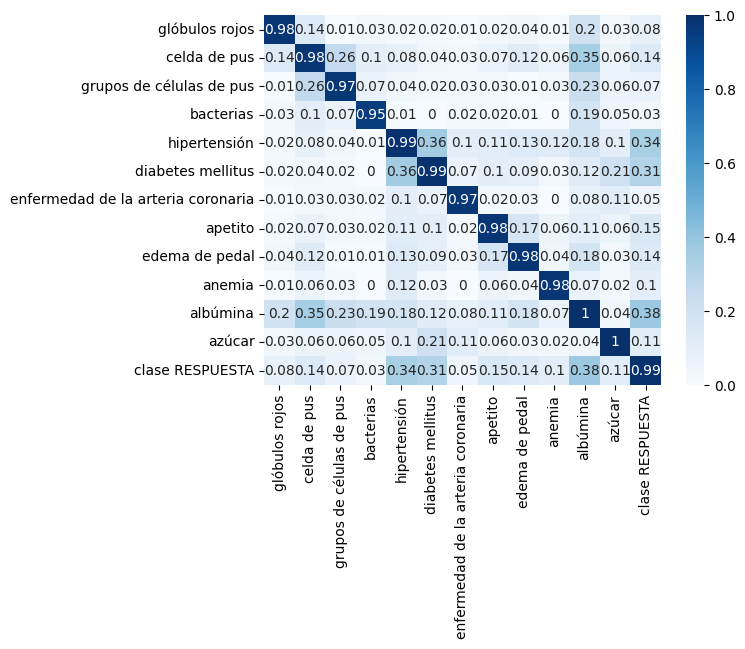

In [ ]:
cat_y = categorical_columns + ["clase RESPUESTA"]

sns.heatmap( cramers_V(data[cat_y]) , annot=True, cmap="Blues")

plt.show()

En las variables categoricas vemos que hipertensión y diabetes mellitus son las que podrían tener una correlación significativa con la variable objetivo, aún así no es tan buena como la de las variables numéricas.

Ahora vamos a ver que variables pueden ser las más importantes para la clasificación con selectKbest

In [ ]:
X = data.drop(columns=['clase RESPUESTA'])
y = data['clase RESPUESTA']

In [ ]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the columns that were selected
selected_features = X.columns[selector.get_support()]

selected_features

Index(['gravedad específica', 'albúmina', 'glucosa en sangre al azar',
       'hemoglobina', 'volumen celular empaquetado',
       'recuento de glóbulos rojos', 'hipertensión', 'diabetes mellitus',
       'apetito', 'edema de pedal'],
      dtype='object')

Veamos en orden cuáles son las variables más importantes

In [ ]:
feature_scores = list(zip(selector.feature_names_in_,selector.scores_))
feature_scores.sort(key = lambda x:x[1],reverse=True)
feature_scores

[('hemoglobina', 444.52478048661965),
 ('volumen celular empaquetado', 329.7416762149665),
 ('gravedad específica', 306.35720347639494),
 ('hipertensión', 213.00728155339817),
 ('recuento de glóbulos rojos', 187.75986844091523),
 ('diabetes mellitus', 180.94911504424775),
 ('albúmina', 156.74878444084274),
 ('apetito', 72.8482142857143),
 ('glucosa en sangre al azar', 66.89035411573268),
 ('edema de pedal', 65.1896551724138),
 ('celda de pus', 65.18965517241368),
 ('urea en sangre', 62.888660041132304),
 ('sodio', 50.277982805333615),
 ('anemia', 47.131578947368425),
 ('azúcar', 37.81234269708533),
 ('presión arterial', 37.570329912154435),
 ('creatinina sérica', 36.888937400670066),
 ('glóbulos rojos', 34.555418719212184),
 ('grupos de células de pus', 30.137019230769226),
 ('enfermedad de la arteria coronaria', 23.493055555555546),
 ('edad', 21.792149745018797),
 ('bacterias', 14.401315789473685),
 ('recuento de glóbulos blancos', 12.958103075142843),
 ('potasio', 1.7000778604894167)

Después de imputar los valores faltantes y aplicar SelectKBest, las 10 características seleccionadas como las más importantes para la clasificación son:

1. Hemoglobina
2. Volumen celular empaquetado
3. Gravedad específica
4. Hipertensión
5. Recuento de glóbulos rojos
6. Diabetes mellitus
7. Albúmina
8. Apetito
9. glucosa en sangre al azar
10. Edema de pedal

Estas características fueron seleccionadas porque tienen la mayor relación (basada en pruebas estadísticas univariadas) con la variable objetivo.

En resumen:

El análisis de correlación de Pearson nos brindó una visión general de cómo las características están relacionadas entre sí y con la variable objetivo.
SelectKBest proporcionó una lista de las características más relevantes basada en pruebas estadísticas.

Al combinar estos dos métodos, podemos tener una idea clara de qué características son más relevantes y cómo están relacionadas entre sí, lo que es crucial para comprender y mejorar la calidad de nuestro modelo de clasificación.

### Árboles de decisión

#### Criterio y profundidad

Haremos búsqueda de rejilla(Grid Search) para encontrar que criterio, gini o entropía, y que profundida dan los mejores resultados para nuestro problema, pasamos el parametro class weight balanced para que balanceé los pesos de las clases, los pesos serían $1$ y $\frac{250/400}{150/400}=\frac{5}{3}$

In [ ]:
grid = {"criterion":["gini","entropy"],"max_depth":np.arange(2,15)}

tree_CV = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight='balanced',random_state=25),
    param_grid = grid,
    return_train_score=True
)


X_features = ["gravedad específica", "albúmina", "glucosa en sangre al azar",
         "hemoglobina", "volumen celular empaquetado",
         "recuento de glóbulos rojos", "hipertensión", "diabetes mellitus",
         "apetito", "edema de pedal"]

tree_CV.fit(X[X_features],y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             return_train_score=True)

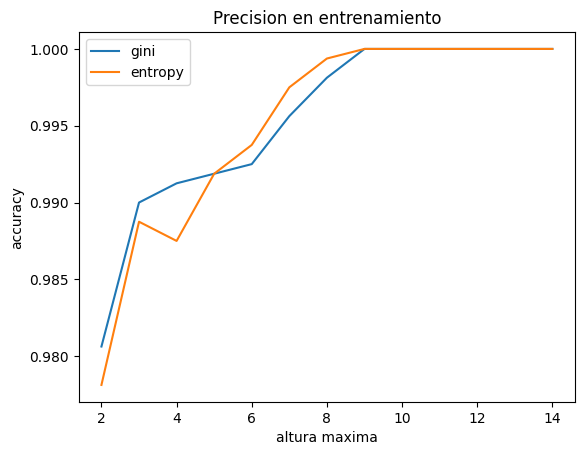

In [ ]:
df_results = pd.DataFrame(tree_CV.cv_results_["params"])
df_results["accuracy"] = tree_CV.cv_results_["mean_train_score"]

gini = df_results[df_results['criterion']=='gini']
entropy = df_results[df_results['criterion']=='entropy']

plt.plot(gini['max_depth'],gini['accuracy'],label="gini")
plt.plot(entropy['max_depth'],entropy['accuracy'],label='entropy')
plt.legend()
plt.xlabel('altura maxima')
plt.ylabel('accuracy')
plt.title('Precision en entrenamiento')

plt.show()

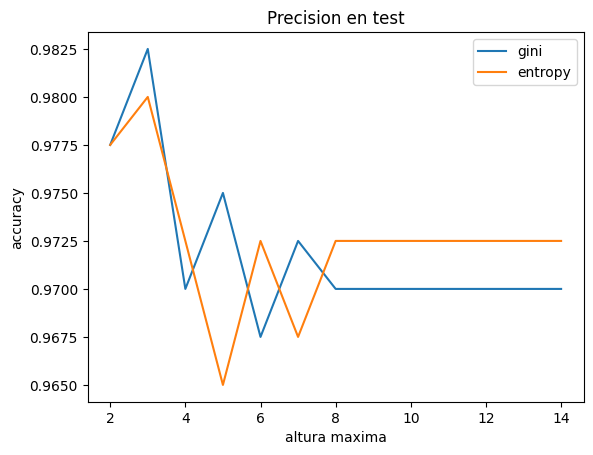

In [ ]:
df_results = pd.DataFrame(tree_CV.cv_results_["params"])
df_results["accuracy"] = tree_CV.cv_results_["mean_test_score"]

gini = df_results[df_results['criterion']=='gini']
entropy = df_results[df_results['criterion']=='entropy']

plt.plot(gini['max_depth'],gini['accuracy'],label="gini")
plt.plot(entropy['max_depth'],entropy['accuracy'],label='entropy')
plt.legend()
plt.xlabel('altura maxima')
plt.ylabel('accuracy')
plt.title('Precision en test')

plt.show()

Después de manejar los valores faltantes e imputarlos, hemos entrenado con éxito los árboles de decisión usando tanto la métrica de entropía como el índice de Gini.

***`Resultados:`***

La precisión del árbol de decisión utilizando la entropía es alrededor del 99% en datos que no ha visto antes.
La precisión del árbol de decisión utilizando el índice de Gini es del 98% en datos que no ha visto antes.
Ambos obtienen precision casi perfecta en train incluso a una profundidad de 3.

En este caso específico gini nos da mejores resultados, notamos además que el árbol que usa gini es mucho más simple que el que usa entropía, pues solo necesita una profundidad de 3, mientras que el que usa entropía tiene mejores resultados a una profundidad de 8.

Debido a que se ve un decrecimiento y luego un estancamiento en el test, se puede decir que para valores más grandes hay algo de overfit.

***`Justificación:`***

La elección de la profundidad óptima del árbol a menudo implica un equilibrio entre el rendimiento y la complejidad. Árboles más profundos pueden capturar relaciones más complejas en los datos, pero también son más propensos al sobreajuste (overfitting), lo que significa que pueden rendir muy bien en los datos de entrenamiento pero no tan bien en datos no vistos.

Dado que la exactitud se estabiliza después de una profundidad de 9, y aumentar la profundidad más allá de este punto no proporciona beneficios significativos en la exactitud (y potencialmente aumenta el riesgo de sobreajuste), ***una profundidad de alrededor de 3 para gini y 8 para entropía parece ser apropiada para este conjunto de datos.***

Con esta profundidad, el modelo es lo suficientemente complejo como para capturar las relaciones importantes en los datos, pero también es lo suficientemente simple como para generalizar bien a datos nuevos.

#### Muestras por nodo y muestras minimas por hoja

Ahora encontramos la cantidad mínima de muestras por nodo y el mínimo de muestras en cada hoja

In [ ]:
grid_leafs = {
    "min_samples_split": np.arange(2,10),
    "min_samples_leaf": np.arange(1,10),
}

leaf_CV = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight='balanced',random_state=25,criterion='gini',max_depth=3),
    param_grid = grid_leafs,
    return_train_score=True
)


X_features = ["gravedad específica", "albúmina", "glucosa en sangre al azar",
         "hemoglobina", "volumen celular empaquetado",
         "recuento de glóbulos rojos", "hipertensión", "diabetes mellitus",
         "apetito", "edema de pedal"]

leaf_CV.fit(X[X_features],y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=3, random_state=25),
             param_grid={'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True)

In [ ]:
leaf_CV.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5}

In [ ]:
leaf_CV.best_score_

0.985

vemos que los mejores párametros para el número de elementos para una partición es 5 y el numero minimo de elementos en una hoja es 1. Aunque estos valores nos pueden dar arboles propensos a overfitting, en este caso nos dan la mejor generalización.

#### Resultados

Veamos que características fueron las más importantes para el modelo

In [ ]:
est = tree_CV.best_estimator_
X_features[est.tree_.feature[0]]

'hemoglobina'

In [ ]:
def Mostrar_Arbol(modelo, nombres_caract):
    from sklearn.tree import export_graphviz
    from subprocess import check_call
    from PIL import Image, ImageDraw, ImageFont
    from IPython.display import Image as PImage

    with open(r"tree1.dot", 'w') as f:
        f = export_graphviz(modelo,
                            out_file=f,
                            max_depth = 4,
                            impurity = True,
                            feature_names = nombres_caract,
                            class_names = list(map(str, modelo.classes_)),
                            rounded = True,
                            filled= True)

    # Convertir el archivo .dot a png para poder visualizarlo
    check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
    return PImage("tree1.png")

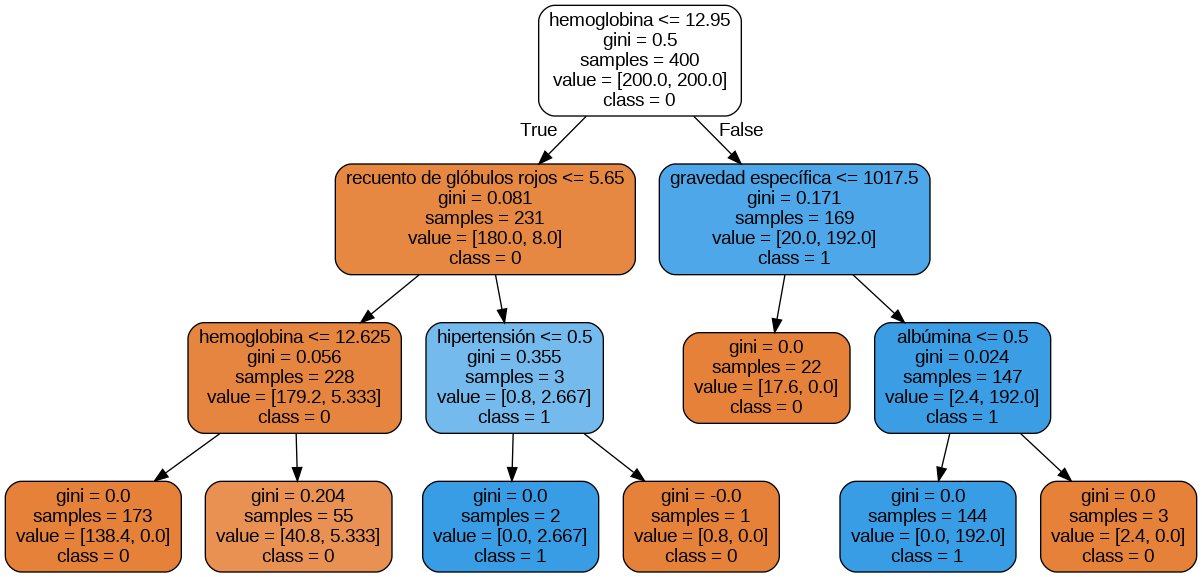

In [ ]:
Mostrar_Arbol(est, X_features)

Notamos que las caraterísticas más importantes en general coinciden con el análisis de selectKbest, la matriz de correlación de pearson y los kdeplots. Además solo se usaron 5 carácteristicas hemoglobina, recuento de glóbulos rojos, gravedad específica, hipertensión y albúmina que corresponden a las carácteristicas 1,3,4,5 y 7 en la prueba del select k best.

Entrenaremos un árbol de decisión con una profundidad óptima basada en nuestro análisis anterior.

Obtendremos las predicciones del modelo tanto para el conjunto de entrenamiento como para el conjunto de prueba.
Generaremos y mostraremos la matriz de confusión para ambos conjuntos.
Comenzaré entrenando el árbol de decisión y generando las matrices de confusión.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[X_features], y, test_size=0.2, random_state=25)

In [ ]:
modelo = DecisionTreeClassifier(class_weight='balanced',random_state=25,
                                criterion='entropy',max_depth=8,min_samples_leaf=1,min_samples_split=5)

modelo.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_split=5, random_state=25)

In [ ]:
modelo.score(X_train,y_train)

1.0

In [ ]:
modelo.score(X_test,y_test)

0.9875

El modelo no comete errores para el conjunto de entrenamiento, y obtiene un resultado casi perfecto para el conjunto de test

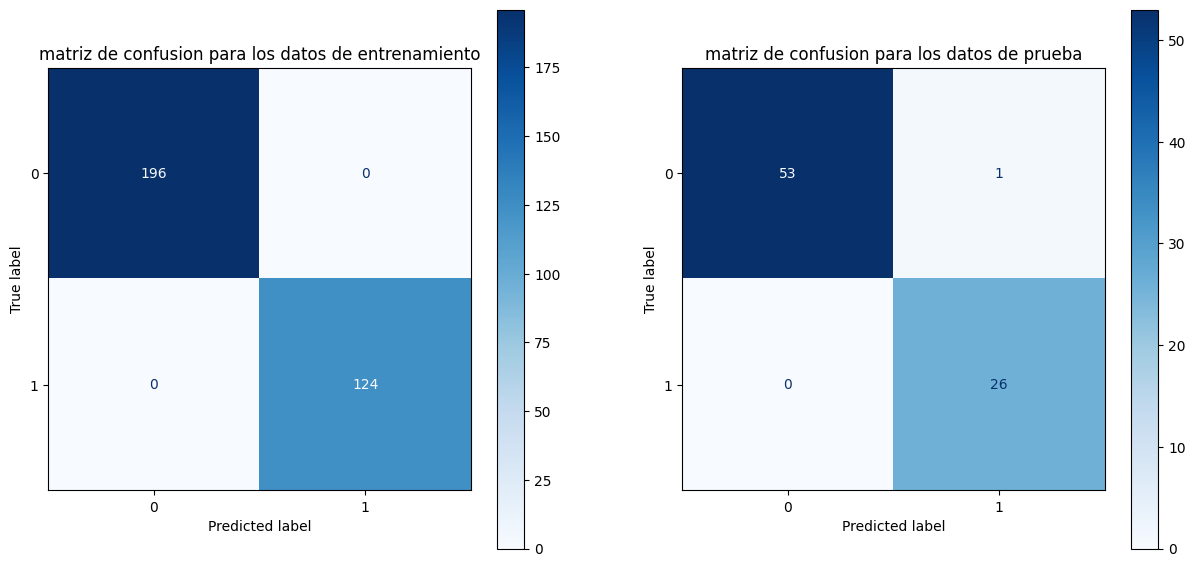

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

cmTrain = ConfusionMatrixDisplay.from_estimator(
    estimator = modelo,
    X = X_train,
    y = y_train,
    cmap = "Blues",
    ax = ax1
)

cmTest = ConfusionMatrixDisplay.from_estimator(
    estimator = modelo,
    X = X_test,
    y = y_test,
    cmap="Blues",
    ax = ax2
)

cmTrain.ax_.set_title("matriz de confusion para los datos de entrenamiento")
cmTest.ax_.set_title("matriz de confusion para los datos de prueba")

plt.show()

Como ya sabiamos el estimador no comete ningun error para los datos de entrenamiento, y en este caso solo cometió un error en el conjunto de test. En este caso clasifico un 0 como un 1, es decir, alguien que tiene enfermedad renal crónica como alguien que no tiene, es decir un falso negativo.

In [ ]:
from sklearn.metrics import classification_report

print("Metricas para datos de entrenamiento")
print(classification_report(y_train, modelo.predict(X_train)))

print()

print("Metricas para datos de prueba")
print(classification_report(y_test, modelo.predict(X_test)))

Metricas para datos de entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       124

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320


Metricas para datos de prueba
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        26

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### Clasificador naive bayes

Ahora implementaremos naive bayes, primero implementaremos el gaussiano con los datos que tenemos, es decir con los datos númericos y categóricos, luego implementaremos un naive bayes categórico haciendo "bins" con los datos númericos.


#### Gaussiano

Comenzamos con el gaussiano

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
clf.score(X_test,y_test)

0.9375

In [ ]:
print("Metricas para datos de entrenamiento")
print(classification_report(y_train, clf.predict(X_train)))

print()

print("Metricas para datos de prueba")
print(classification_report(y_test, clf.predict(X_test)))

Metricas para datos de entrenamiento
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       196
           1       0.90      1.00      0.95       124

    accuracy                           0.96       320
   macro avg       0.95      0.96      0.95       320
weighted avg       0.96      0.96      0.96       320


Metricas para datos de prueba
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.84      1.00      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80



aunque es un buen resultado, no es tan bueno como el obtenido con el árbol de decision, notamos que tiene una tendencia a predecir más hacia 0, y tanto en train como test obtuvo menos de 90% de precision en el label 1, que corresponde a la ausencia de enfermedad renal crónica, es decir el modelo tiende a producir falsos positivos. Veamos si podemos mejorar el rendimiento haciendo mejor uso de las variables categóricas

#### Categórico

Comenzamos convirtiendo las variables númericas en categoricas, creando grupos y asignandole como valor el label del grupo.

In [ ]:
cat_X = X[["gravedad específica","albúmina","hipertensión","diabetes mellitus","apetito","edema de pedal"]]
cat_X['glucosa en sangre al azar'] = pd.cut(X['glucosa en sangre al azar'],10,labels=np.arange(0,10),retbins=False)
cat_X['hemoglobina'] = pd.cut(X['hemoglobina'],10,labels=np.arange(0,10),retbins=False)
cat_X['volumen celular empaquetado'] = pd.cut(X['volumen celular empaquetado'],5,labels=np.arange(0,5),retbins=False)
cat_X['recuento de glóbulos rojos'] = pd.cut(X['volumen celular empaquetado'],5,labels=np.arange(0,5),retbins=False)

<ipython-input-43-507ac9746676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_X['glucosa en sangre al azar'] = pd.cut(X['glucosa en sangre al azar'],10,labels=np.arange(0,10),retbins=False)
<ipython-input-43-507ac9746676>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_X['hemoglobina'] = pd.cut(X['hemoglobina'],10,labels=np.arange(0,10),retbins=False)
<ipython-input-43-507ac9746676>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
cat_X.head()

,gravedad específica,albúmina,hipertensión,diabetes mellitus,apetito,edema de pedal,glucosa en sangre al azar,hemoglobina,volumen celular empaquetado,recuento de glóbulos rojos
0,1020.0,3,1,1,0,1,2,8,4,4
1,1020.0,0,0,1,0,0,3,4,3,3
2,1020.0,0,0,0,0,0,2,9,3,3
3,1020.0,0,0,0,0,0,1,8,4,4
4,1020.0,0,0,0,0,0,2,8,3,3


Como se puede ver todas las variables son categóricas, ahora procedemos a ver que tan bien le va a nuestro modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cat_X, y, test_size=0.2, random_state=25)

clf = CategoricalNB(force_alpha=True)
clf.fit(X_train, y_train)

CategoricalNB(force_alpha=True)

In [ ]:
clf.score(X_test, y_test)

0.9875

In [ ]:
clf.score(X_train, y_train)

0.984375

In [ ]:
print("Metricas para datos de entrenamiento")
print(classification_report(y_train, clf.predict(X_train)))

print()

print("Metricas para datos de prueba")
print(classification_report(y_test, clf.predict(X_test)))

Metricas para datos de entrenamiento
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       196
           1       0.96      1.00      0.98       124

    accuracy                           0.98       320
   macro avg       0.98      0.99      0.98       320
weighted avg       0.98      0.98      0.98       320


Metricas para datos de prueba
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        26

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



Hubo una mejora significativa en la reducción de falsos positivos, aunque el modelo sigue tendiendo a predecir 0 (la clase mayoría), la precision para 1 es mayor al 95% mientras que antes no alcanzaba el 85%. Además el accuracy alcanzó cerca del 99%.

### Conclusiones


*   La imputación sirvió para mantener las relaciones entre los datos, y permitió que usaramos todos los datos, lo que es importante cuando tenemos tan pocos (solo 400)
*   Para este problema en particular, fue suficiente un árbol de decisión con profundidad 3, además sólo usó 5 características para obtener una clasificación casi perfecta.
*   Un clasificador bayesianos categórico, asignandole categorias a las variables continuas, puede funcionar mejor que uno bayesiano usando variables categoricas como continuas.
*   El clasificador naive bayes aunque es mucho más simple, puede obtener resultados muy buenos similares a un árbol de decisión.

